In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import koreanize_matplotlib
import matplotlib.pyplot as plt
import statsmodels

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
#mac
#plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
#window
plt.rc('font', family='Malgun Gothic')

#그래프가 노트북 안에 보이게
%matplotlib inline

In [3]:
import os

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')

elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

5. 데이터 로드

In [4]:
df = pd.read_csv('data/NHIS_OPEN_GJ_2017.CSV', encoding='cp949')
df.shape

# sns사용시  숫자로 표기되어서 문자열로인식못해서 에러가남


(1000000, 34)

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
# 칼럼별 널데이타 카운트
df_null = df.isnull().sum()
df_null  # 시리즈로 나옴

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [8]:
df_null = df_null.reset_index()  # 시리즈에 인덱스를 붙여 데이터프레임으로
df_null.columns = ['컬럼명', '결측치수']
df_null

,컬럼명,결측치수
0,기준년도,0
1,가입자일련번호,0
2,성별코드,0
3,연령대코드(5세단위),0
4,시도코드,0
5,신장(5Cm단위),262
6,체중(5Kg 단위),268
7,허리둘레,440
8,시력(좌),288
9,시력(우),279


In [9]:
df_null_top = df_null.sort_values(by='결측치수', ascending=False).head(5)
df_null_top

,컬럼명,결측치수
29,결손치유무,1000000
31,제3대구치(사랑니)이상,1000000
30,치아마모증유무,1000000
28,치아우식증유무,1000000
32,치석,601252


In [10]:
drop_columns = df_null_top['컬럼명'].tolist()
drop_columns

['결손치유무', '제3대구치(사랑니)이상', '치아마모증유무', '치아우식증유무', '치석']

In [11]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(1000000, 34)
(1000000, 29)


In [12]:
df = df.drop("데이터공개일자", axis=1)
print(df.shape)

(1000000, 28)


8. 일부데이터 요약하기

In [13]:
# 여러컬럼을 가져옵니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]]  # 컬럼명에 괄호가 있으면 이렇게 가져올 수 없습니다.


,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


In [14]:
df[["(혈청지오티)ALT"]]  # 하나라도 괄호두개를 넣으면 데이타프레임형태가 됨 

,(혈청지오티)ALT
0,41.0
1,13.0
2,62.0
3,24.0
4,62.0
...,...
999995,11.0
999996,11.0
999997,13.0
999998,30.0


In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [16]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()  # 이상치가 있다는것을 알수있음 max값 이상

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


In [17]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe().T

,count,mean,std,min,25%,50%,75%,max
(혈청지오티)ALT,999956.0,25.859343,25.814268,1.0,15.0,20.0,30.0,6710.0
(혈청지오티)AST,999958.0,26.075068,24.437136,1.0,19.0,23.0,28.0,9999.0


9.value_counts 로 값 집계하기

>특정칼럼에 대해 그룹해서 빈도수 카운트해서시리즈로 만듬

In [18]:
df['성별코드'].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [19]:
df['흡연상태'].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

10. groupby 와 pivot_table 사용하기
value_counts와 달리 두개이상의 칼럼을 분석할때 씀

In [20]:
# 공식문서 예시보기
df.groupby?

In [21]:
df.groupby('성별코드').mean()  # 성별코드별로 그룹해서 모든갑에 대해 평균을 구함

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499946.580386,10.324381,34.15184,168.516441,70.211016,85.171843,1.035268,1.034448,1.032813,...,112.716565,15.216352,1.102723,0.975555,28.150818,30.763525,49.446249,2.058548,0.670136,0.433298
2,2017.0,500061.589758,10.783424,33.25853,155.078899,55.701656,77.061441,0.915023,0.910340,1.031968,...,113.243661,13.099480,1.087451,0.738854,23.723238,20.302868,23.396111,1.094082,0.300790,0.359603


In [22]:
df.groupby('성별코드').mean()['허리둘레']  # 허리둘레만

성별코드
1    85.171843
2    77.061441
Name: 허리둘레, dtype: float64

In [23]:
df.groupby('성별코드').count()['가입자일련번호']  #유니크한 값이라 카운트 가능

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [24]:
#성별코드와 음주여부로 그룹화하고 갯수를 샌후 가입자일련번호만 가져옵니다.

df.groupby(['성별코드', '음주여부']).count()['가입자일련번호']

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [25]:
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()  # 위와 같은 결과
# 성별코드와 음주여부로 그룹화하고 갯수를 샌후 가입자일련번호만 가져온 다음에 카운트

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [26]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()  # 간수치하고 관련
#음주자가 높게나옴

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [27]:
# 성별코드와 음주여부로 감마지티피의 요약수치
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()
# max값에 이상치가있음

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [28]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(
    ['count', 'mean', 'median', 'min', 'max'])

count       mean  median  min    max
성별코드 음주여부                                       
1    0.0   175139  34.710544    25.0  1.0  999.0
     1.0   355819  56.707919    37.0  1.0  999.0
2    0.0   327559  22.660238    17.0  1.0  999.0
     1.0   140913  25.115149    17.0  1.0  999.0

In [29]:
df.pivot_table(index='음주여부')  # 모든 데이타를 평균내줌 

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,성별코드,수축기혈압,...,이완기혈압,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017.0,1.651602,122.027782,...,75.098306,1.041086,1.042881,60.082827,194.699007,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017.0,1.283686,122.967846,...,77.102989,1.020745,1.021758,66.778226,196.346568,144.077696,82.484576,14.704997,0.892460,1.896158


In [30]:
df.groupby('음주여부').mean()  # 위와 같은 결과

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,2017.0,499800.113284,1.651602,11.344766,34.022483,158.733328,60.082827,80.269019,0.932546,0.930175,...,56.161852,114.467632,13.748950,1.097176,0.837132,25.094792,24.107862,26.858541,1.320330,0.358768
1.0,2017.0,500196.825986,1.283686,9.724241,33.444865,165.744820,66.778226,82.484576,1.025928,1.023050,...,57.606351,111.444394,14.704997,1.093970,0.892460,27.069879,27.634991,47.745678,1.896158,0.439257


In [31]:
df.pivot_table(index='음주여부', values='감마지티피')  # 감마지티피만 평균내줌  

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [32]:
df.pivot_table(index='음주여부', values='가입자일련번호',
               aggfunc="count")  # values 칼럼을 aggfunc으로 집계

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [33]:
# gropuby와 pivot_table의 차이
# groupby는 결과가 (values를 지정해도) 시리즈로 나오고 pivot_table은 결과가 데이터프레임으로 나옴

In [34]:
df.pivot_table(index='음주여부', values='감마지티피', aggfunc='mean')

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [35]:
pd.pivot_table(df, index='음주여부', values='감마지티피')  #aggfunc 지정안하면 평균

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [36]:
pd.pivot_table(df, index='음주여부', values='감마지티피',
               aggfunc='describe')  #aggfunc에 describe가능

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [37]:
pd.pivot_table(df, index=['성별코드', '음주여부'], values='감마지티피',
               aggfunc=['describe', 'mean'])
#grouby처럼 index 여러개 지정가능

describe                                                          \
               25%   50%   75%     count    max       mean  min        std   
성별코드 음주여부                                                                    
1    0.0      18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218   
     1.0      24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084   
2    0.0      13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300   
     1.0      13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812   

                mean  
               감마지티피  
성별코드 음주여부             
1    0.0   34.710544  
     1.0   56.707919  
2    0.0   22.660238  
     1.0   25.115149

###11. 전체 데이터 시각화하기

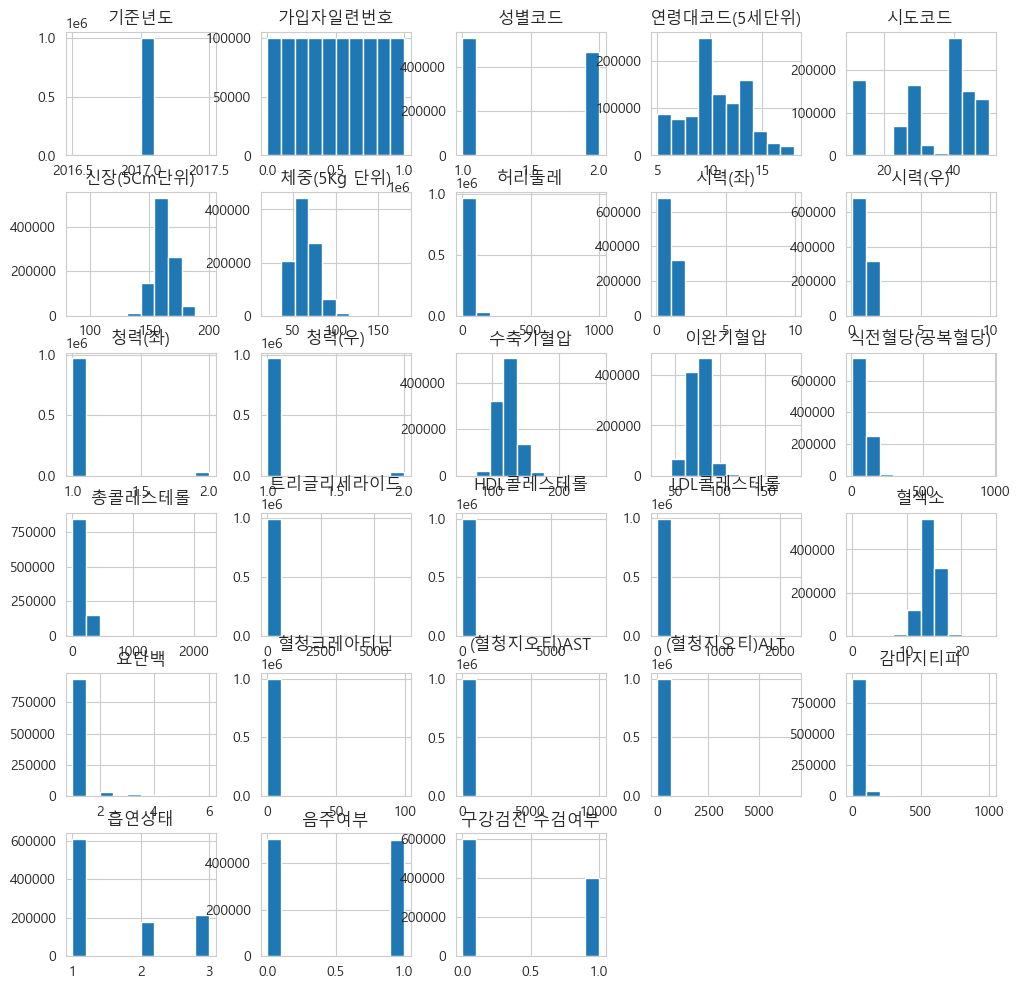

In [38]:
h = df.hist(figsize=(12, 12))  # 판다스 시각화 변수에 대입하면 문자출력없이 바로 결과가 나옴

11.2 슬라이싱 사용해 히스토그램 그리기

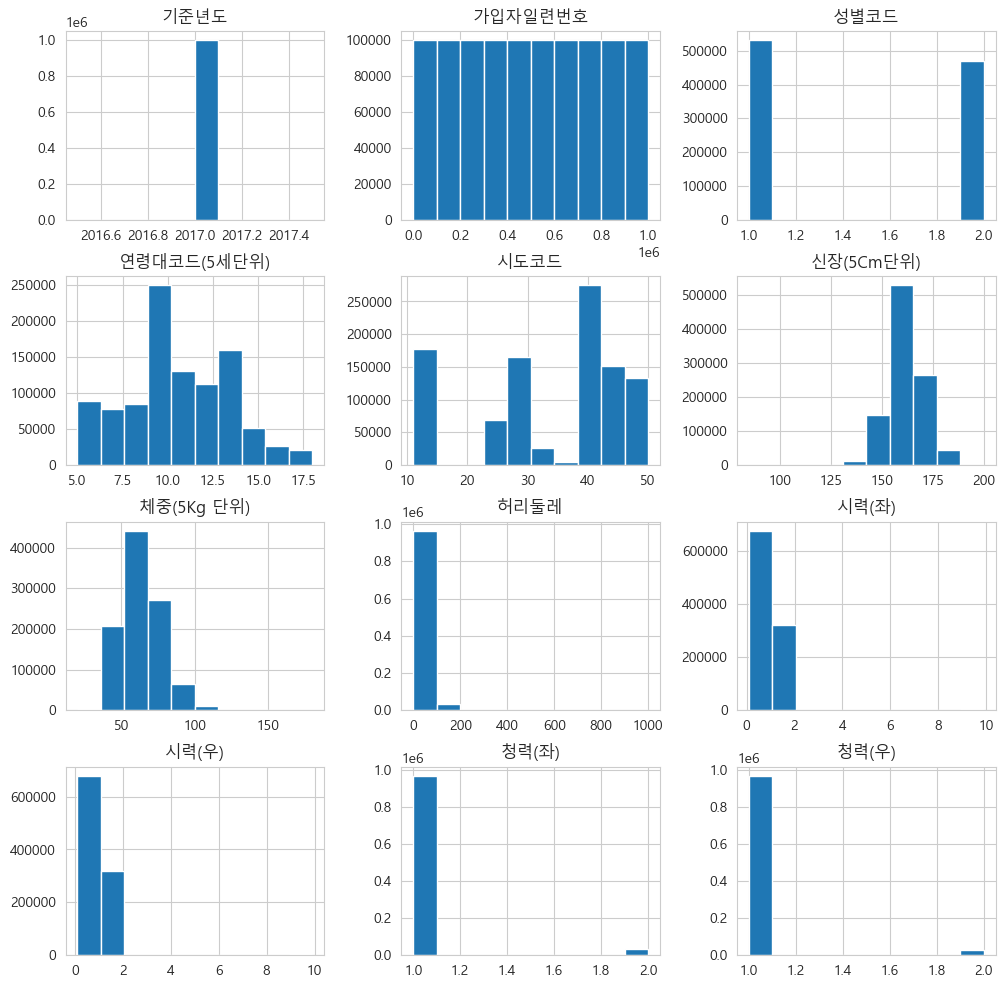

In [39]:
h = df.iloc[:, :12].hist(figsize=(12, 12))  # iloc로  12개의 칼럼만

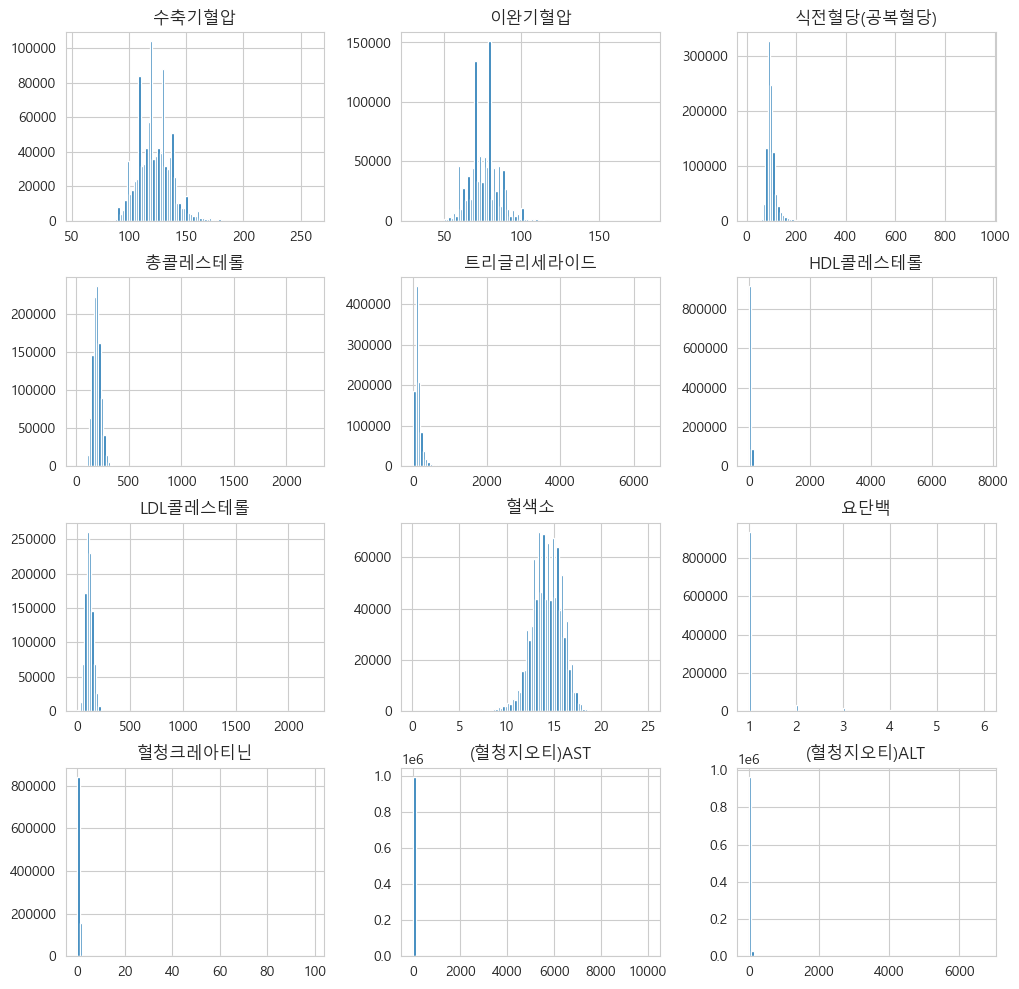

In [40]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)  # iloc로  12개의 칼럼만

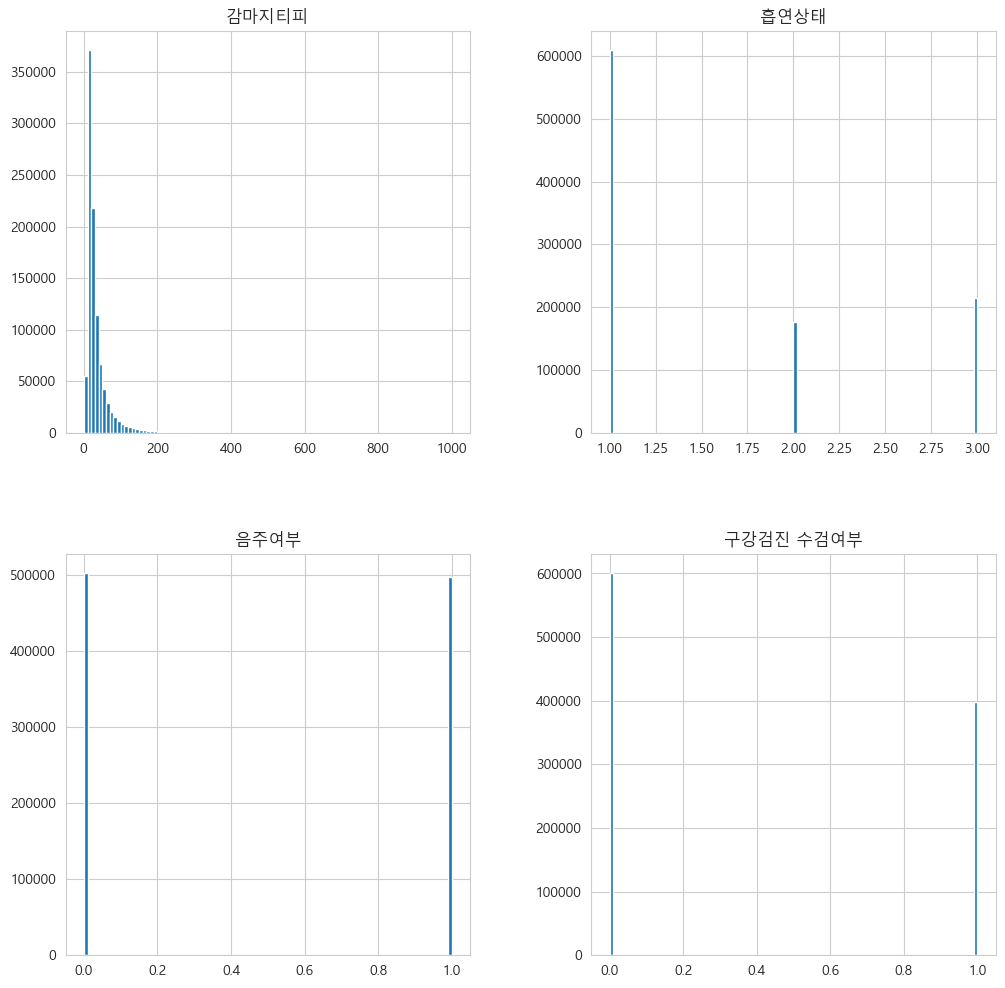

In [41]:
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)  # iloc로  12개의 칼럼만

12 샘플데이터 추출하기

In [42]:
# seaborn 은 그래프
# 내부에서 수학적 연산을 해서 데이타가 많아지면 느려짐
# 따라서 샘플을 사용함
df_sample = df.sample(1000, random_state=1)  # random_state=1 은 랜덤값을 고정시킴
df_sample.shape

(1000, 28)

13. 데이타 시각화 도구 seaborn사용하기
간단하게 고급통계 연산을 할수있다

### 14.범주형테이터시각화(문자형등)
countplot - 음주여부

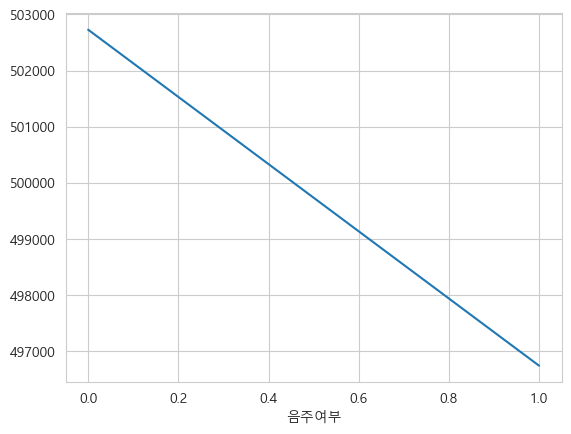

In [43]:
h = df['음주여부'].value_counts().plot()

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


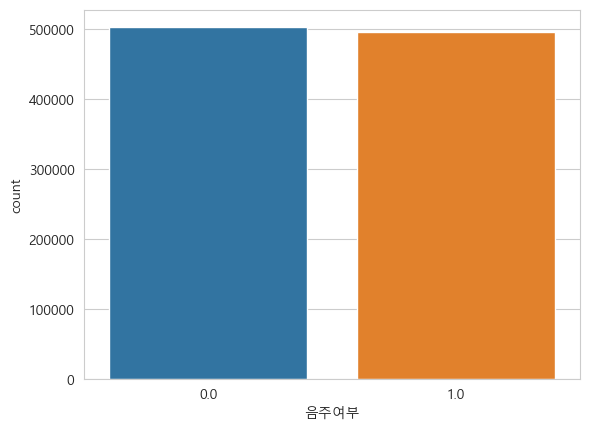

In [44]:
#  countplot - x 에 칼럼을 넣고 y는 넣지 않고 카운트 해준다

h = sns.countplot(data=df, x='음주여부')



14.2 hue옵션사용하기

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

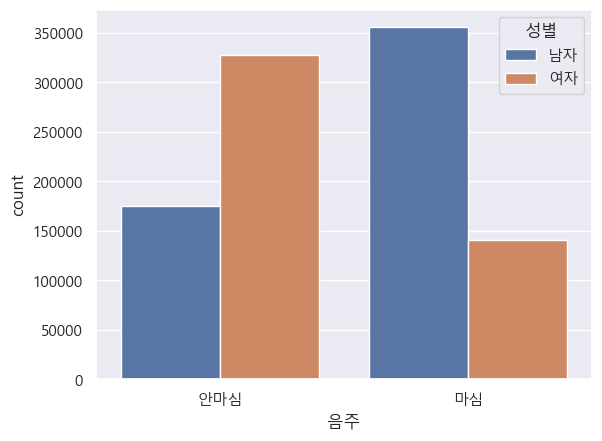

In [52]:
# df['음주여부'] = df['음주여부'].astype(str)
# df['성별코드'] = df['성별코드'].astype(str)
drink = {
    1: '마심',
    0: '안마심',
}

gender = {
    1: '남자',
    2: '여자',
}
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
df['음주'] = df['음주여부'].replace(drink)
df['성별'] = df['성별코드'].replace(gender)
df['흡연'] = df['흡연상태'].replace(smoke)
sns.set(font_scale=1, font='Malgun Gothic')  # 폰트사이즈
h = sns.countplot(data=df, x='음주', hue='성별')

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

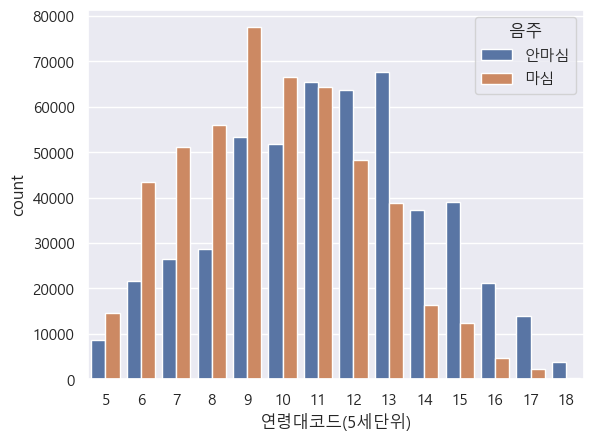

In [53]:
  # lengend 에러 안나게 문자열이라고 알려줌
# df['음주여부'] = df['음주여부'].astype(str)

h = sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주')

14.3 countplot - 키와 몸무게
원래는 연속형이지만
이 데이타는 키는 5cm 체중은 5kg
따라서 범주형으로 볼수있음

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

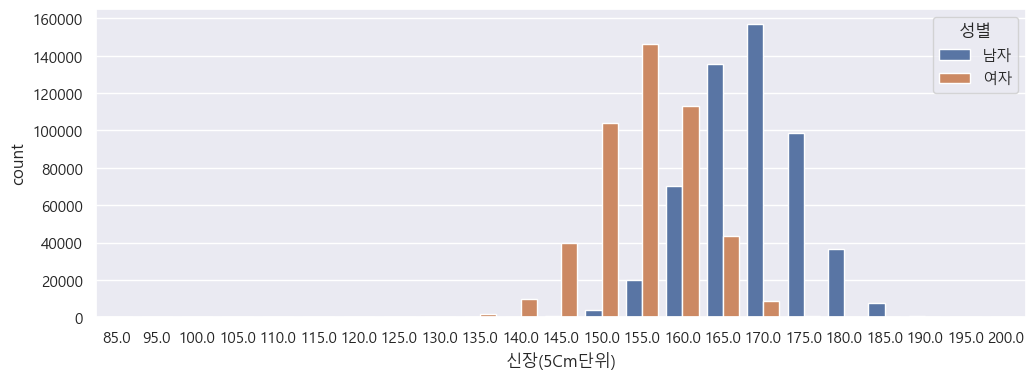

In [54]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별')

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

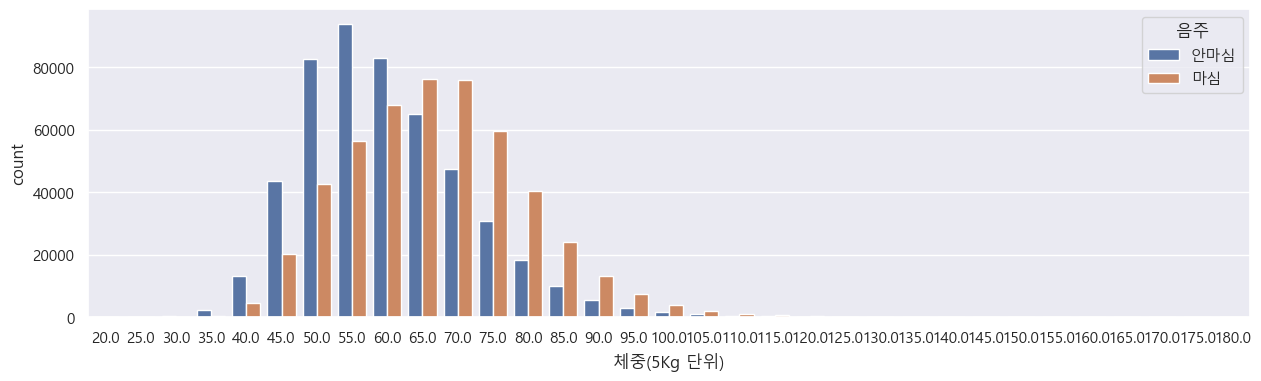

In [55]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg 단위)', hue='음주')

14.4 barplot - 수치형 vs 범주형데이터 시각화

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

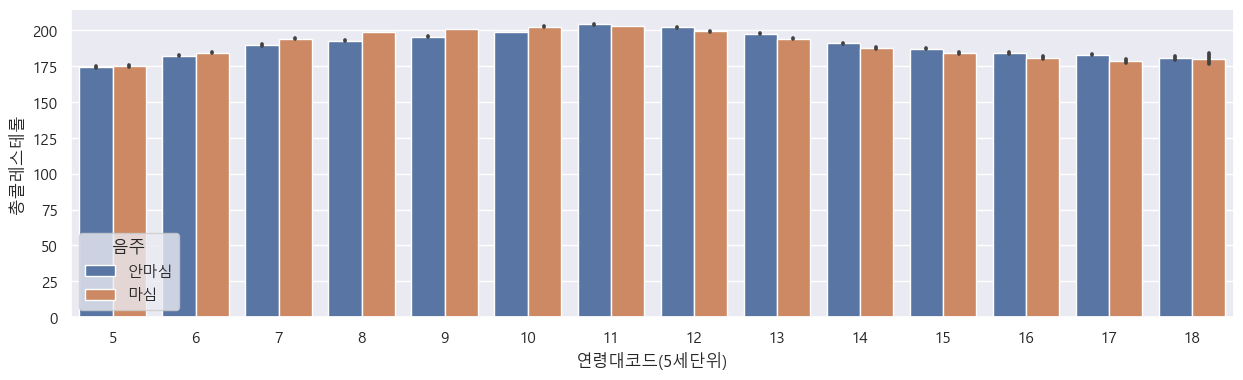

In [56]:
# barplot   x와 y에 모두 값을 넣지만,  x축에는 범주형 y축에는 수치형


# df['음주여부'] = df['음주여부'].astype(str)
# df['성별코드'] = df['성별코드'].astype(str)
# df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].astype(str)

plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주')  # y값은 평균값

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

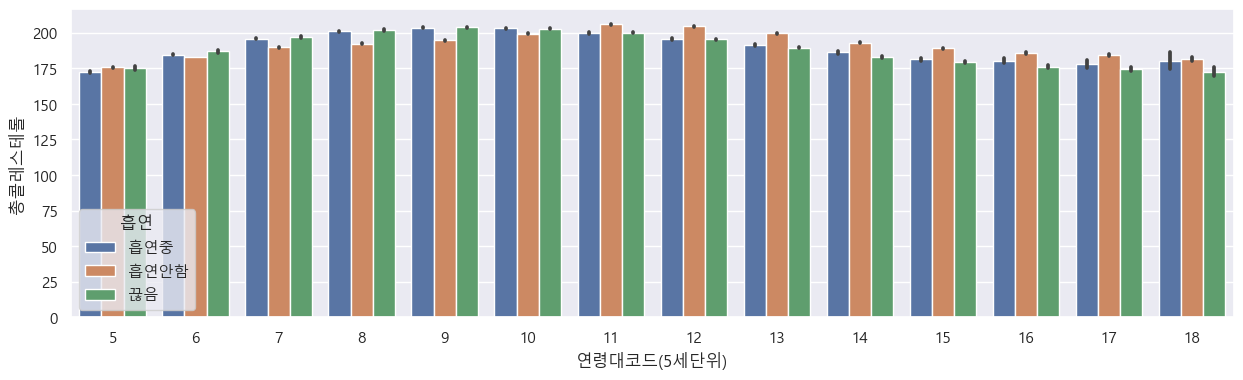

In [57]:
# df['흡연상태'] = df['흡연상태'].astype(str)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연')


ci는 Seaborn의 barplot 함수에서 사용되는 인자 중 하나입니다. 이 인자는 신뢰 구간(confidence interval)을 나타냅니다. ci 값은 신뢰 구간을 표시하고 계산하는 방법을 제어합니다. ci에 대한 주요 옵션은 다음과 같습니다:

ci=None: 기본값입니다. 신뢰 구간을 계산하지 않습니다.

ci="sd": 표준 편차(standard deviation)를 사용하여 68% 신뢰 구간을 계산합니다. 이 옵션은 데이터의 분산을 고려한 간단한 신뢰 구간을 생성합니다.

ci="bootstrapped": 부트스트랩(bootstrap)을 사용하여 95% 신뢰 구간을 계산합니다. 부트스트랩은 데이터에서 재표본화를 수행하여 통계량의 분포를 추정하는 방법으로, 데이터가 충분히 크지 않을 때 신뢰 구간을 생성하는 데 유용합니다.

ci=68 또는 ci=95: 직접 특정 신뢰 수준을 지정할 수도 있습니다.

따라서, 예제 코드에서 ci=95는 95% 신뢰 구간을 생성하도록 지정한 것이며, 트리글리세라이드 열의 값에 대한 신뢰 구간을 표시하게 됩니다. 이를 통해 막대 그래프의 막대 상단에 신뢰 구간이 표시될 것입니다.

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

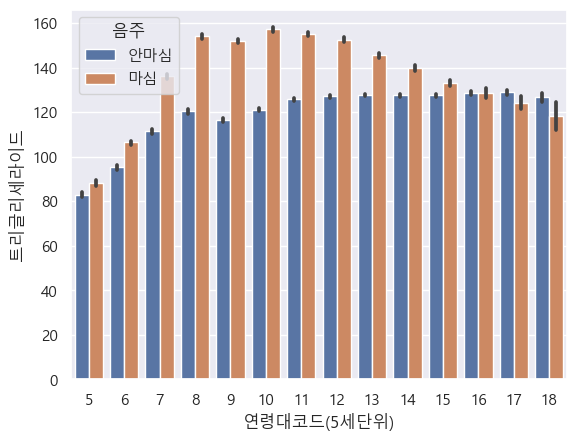

In [58]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주')

F:\Soma\temp\ipykernel_5328\3456512734.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='음주', ci=None)
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_env

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

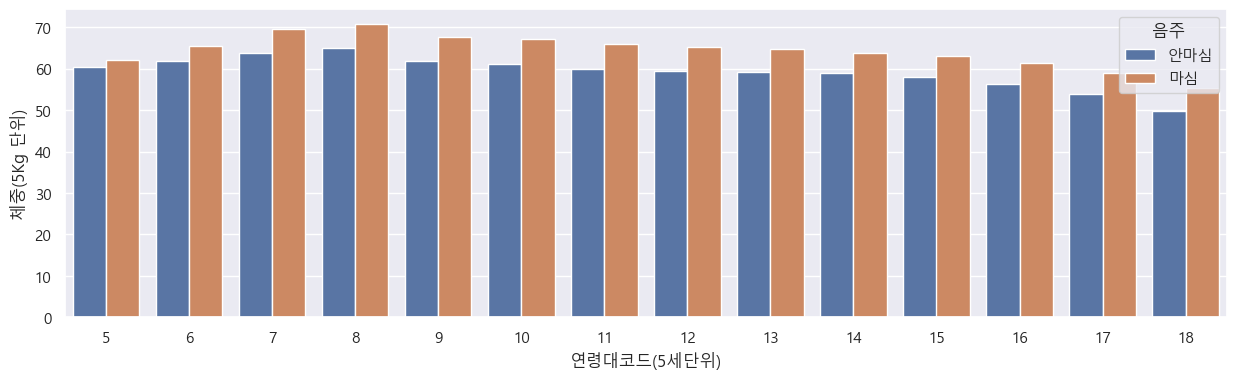

In [59]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='음주', ci=None)

14.5 lineplot and pointplot

F:\Soma\temp\ipykernel_5328\1943242921.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별', ci='sd')
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_en

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

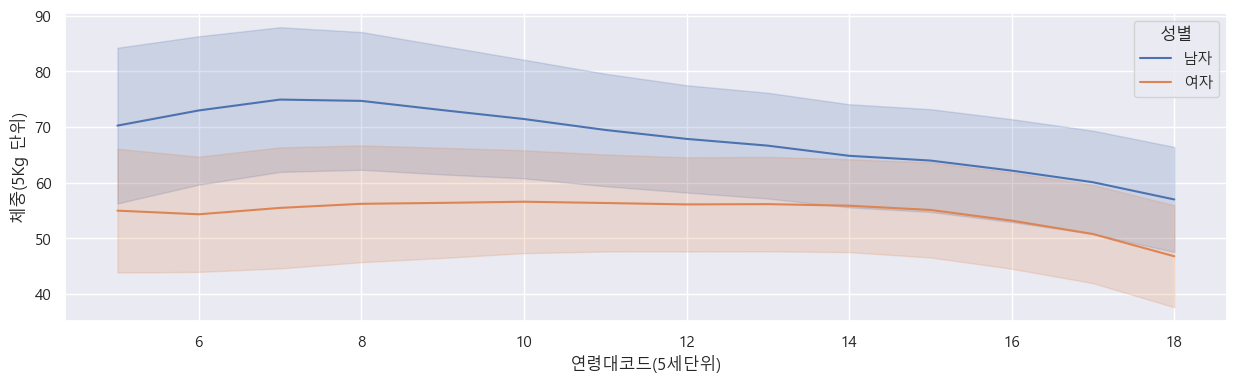

In [60]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별', ci='sd')

F:\Soma\temp\ipykernel_5328\2507793041.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별', ci='sd')
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_env

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

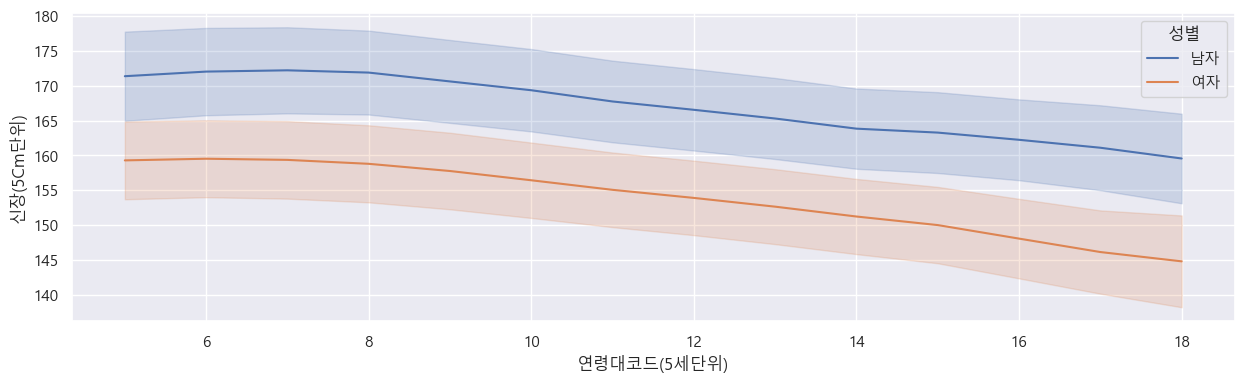

In [61]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별', ci='sd')

F:\Soma\temp\ipykernel_5328\234591498.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주', ci='sd')
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

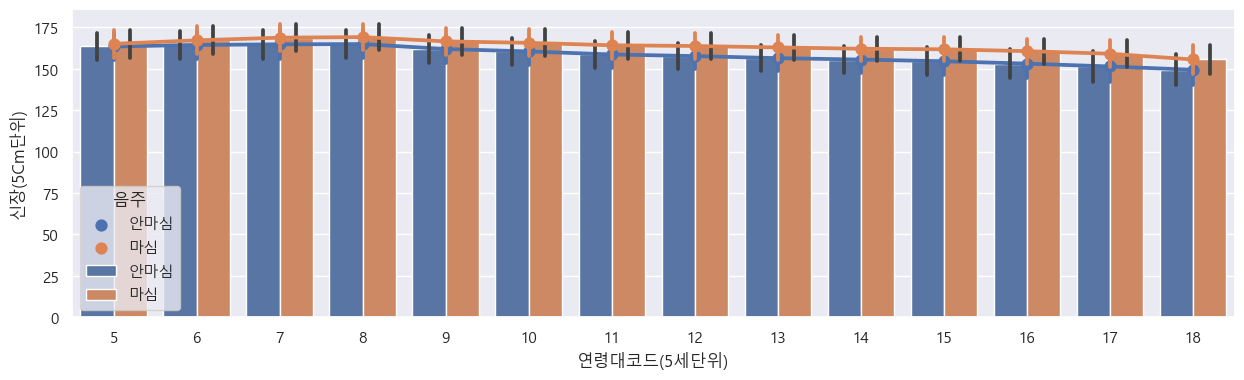

In [62]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주', ci='sd')
sns.pointplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주', ci='sd')

14.6 boxplot
1. 최소값
2. 2사분위수, 중앙값
3. 3사분위수
4. 최대값

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

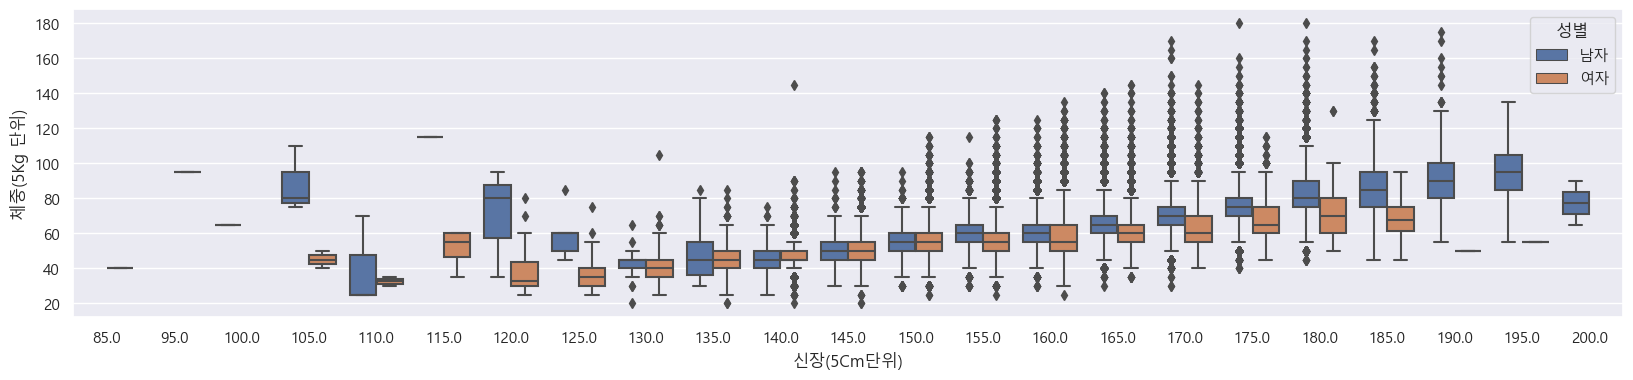

In [63]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=df, x='신장(5Cm단위)', y="체중(5Kg 단위)", hue='성별')


7.violinplot

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

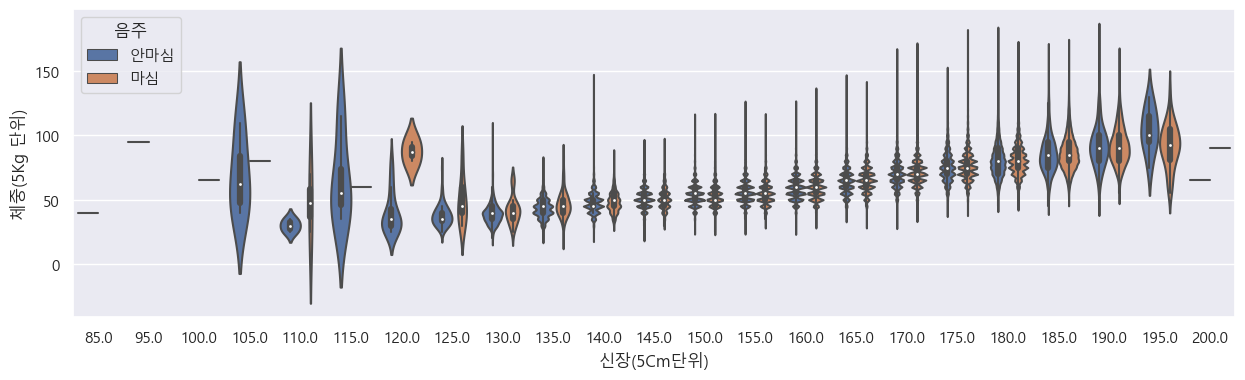

In [70]:
plt.figure(figsize=(15, 4))

sns.violinplot(data=df, x='신장(5Cm단위)', y="체중(5Kg 단위)", hue='음주')

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

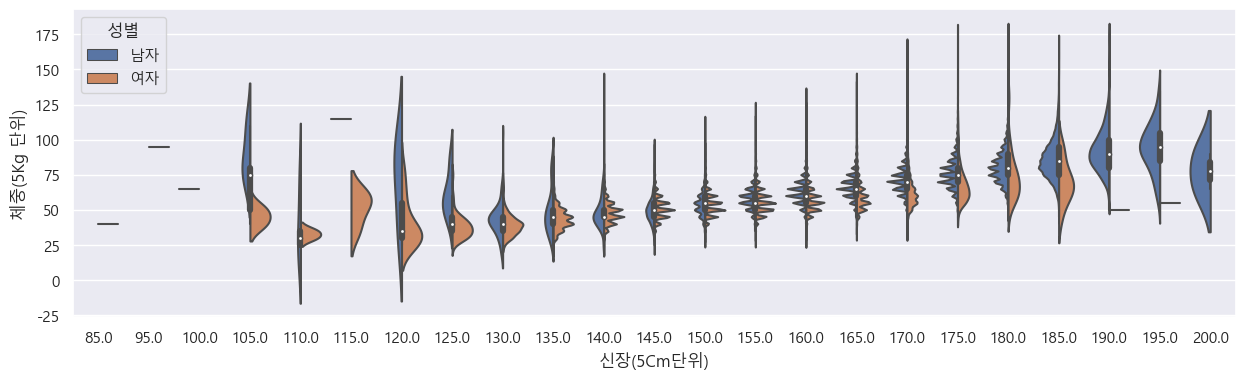

In [69]:
plt.figure(figsize=(15, 4))

sns.violinplot(data=df, x='신장(5Cm단위)', y="체중(5Kg 단위)", hue='성별',
               split=True)

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

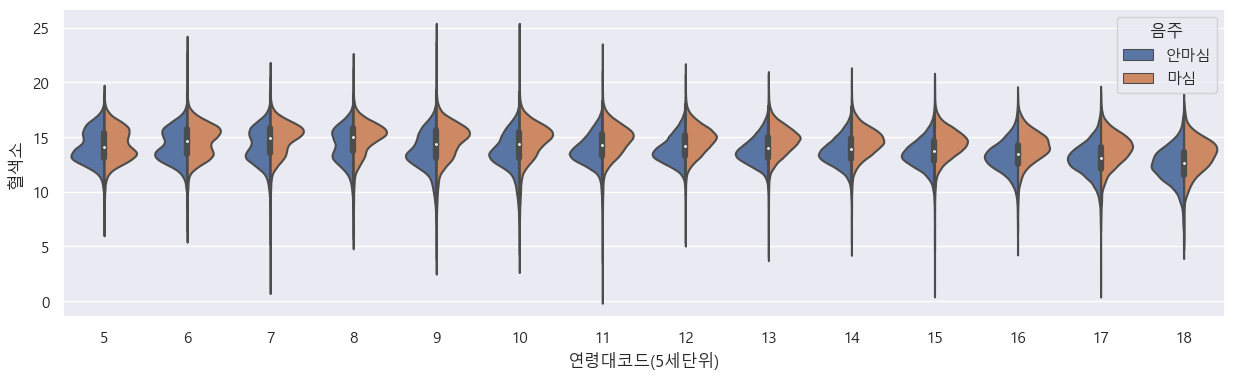

In [68]:
plt.figure(figsize=(15, 4))

sns.violinplot(data=df, x='연령대코드(5세단위)', y="혈색소", hue='음주',
               split=True)

14.8 swarmplot

In [ ]:
plt.figure(figsize=(15, 4))

sns.swarmplot(data=df, x='신장(5Cm단위)', y="체중(5Kg 단위)", hue='음주',
              size=3)
sns.violinplot(data=df, x='신장(5Cm단위)', y="체중(5Kg 단위)")

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

In [ ]:
plt.figure(figsize=(15, 4))

sns.swarmplot(data=df, x='연령대코드(5세단위)', y="혈색소", hue='성별')

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

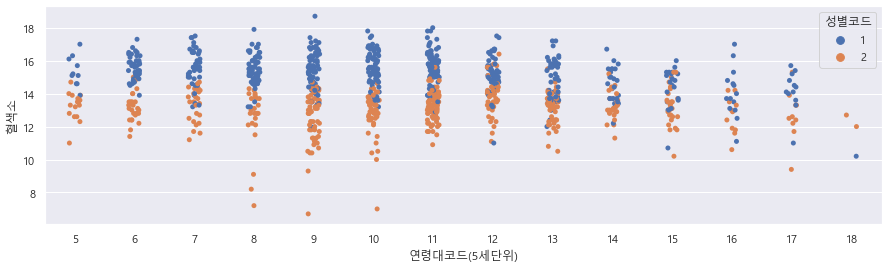

In [65]:
plt.figure(figsize=(15, 4))

sns.stripplot(data=df_sample, x='연령대코드(5세단위)', y="혈색소", hue='성별코드')

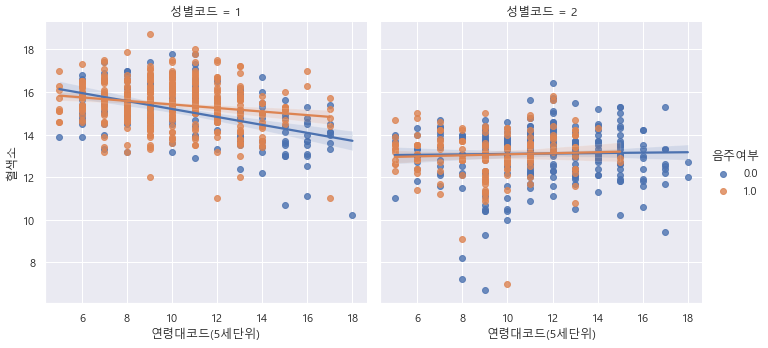

In [153]:
#lmplot으로 그리기

# 회귀선을 그려서 얼마나 상관관계가 있는지 표시함
# lmplot은 그래프를 몰려서 그리지만 swamplot 은 약간 퍼트려줘서 보기좋음
# col을 써서 여러개로 나눠서 그리기 가능 (다변수 시각화)
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')

## 15. 수치형 데이터 시각화
scatterplot - 산점도
수치형 vs 수치형 데이터의 상관관계를 볼때 주로 사용
점의 크기를 데이터의 수치에 따라 다르게 볼수있습니다.

<Figure size 1080x576 with 0 Axes>

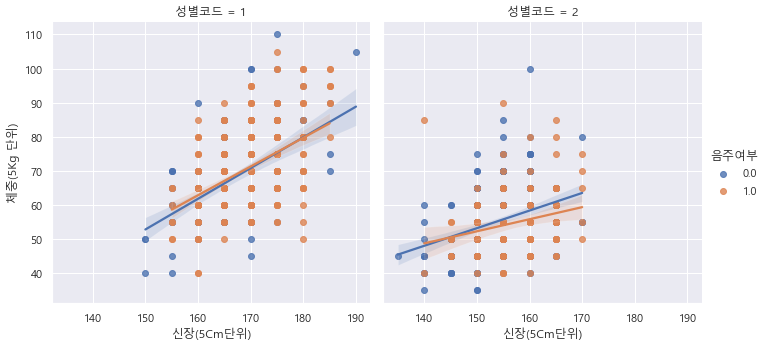

In [67]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y="체중(5Kg 단위)", hue='음주여부',
           col='성별코드')

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

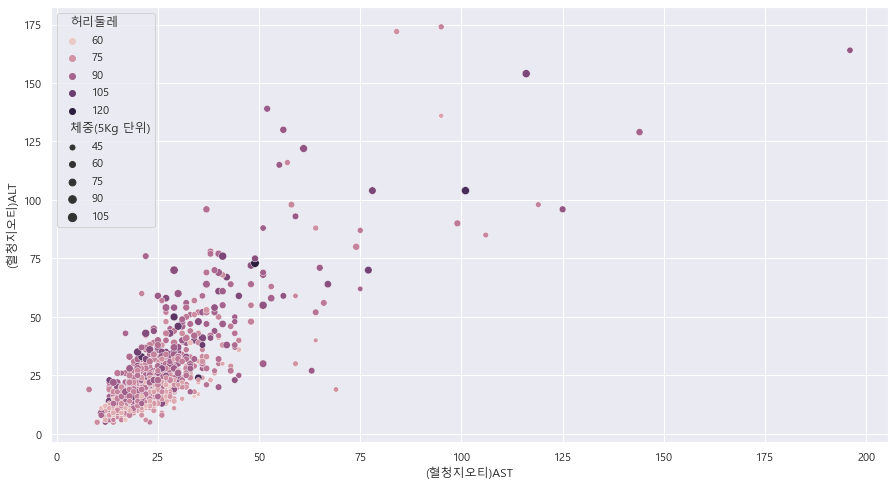

In [68]:
#scatterplot에서는 hue값에 연속된 값도 가능하다

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='허리둘레',
                size='체중(5Kg 단위)')

<Figure size 1080x576 with 0 Axes>

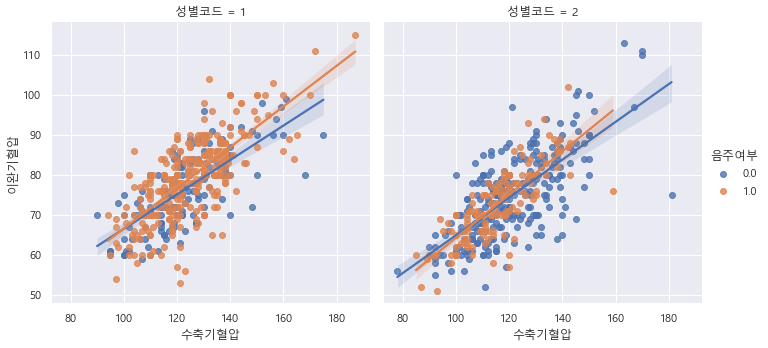

In [69]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=df_sample, x='수축기혈압', y="이완기혈압", hue='음주여부', col='성별코드')

<Figure size 1080x576 with 0 Axes>

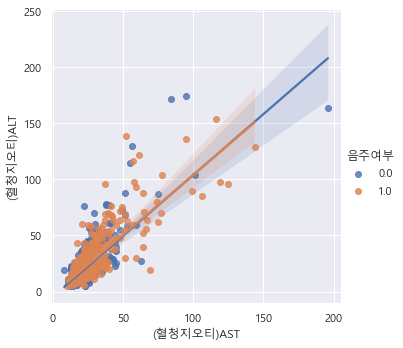

In [70]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부',
           robust=True)
# robust 이상치 제거 다만 연산포함해서 시간이 오래걸림

15.3 이상치 다루기
시각화를 통해 이상치를 제거하고  이상치만 따로 모아 보도록 합니다.

In [71]:
# 이상치 제거
df_ASLT = df_sample[
    (df_sample['(혈청지오티)AST'] < 400) & (df_sample['(혈청지오티)ALT'] < 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,1.0,...,112.0,15.0,2.0,1.2,31.0,33.0,35.0,1.0,0.0,0
849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,0.4,...,131.0,13.7,1.0,0.7,22.0,16.0,19.0,1.0,0.0,1
504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,0.4,...,109.0,15.0,1.0,1.0,19.0,19.0,15.0,3.0,0.0,0
601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,0.3,...,151.0,13.0,1.0,0.8,19.0,13.0,13.0,1.0,0.0,0
980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,0.8,...,71.0,13.7,1.0,0.6,196.0,164.0,265.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,0.8,...,118.0,13.6,1.0,0.7,21.0,16.0,22.0,2.0,1.0,1
875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,0.8,...,157.0,11.8,1.0,0.5,17.0,11.0,12.0,1.0,1.0,1
358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,0.8,...,150.0,14.1,1.0,0.7,24.0,18.0,11.0,1.0,0.0,0
808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,1.2,...,61.0,16.9,1.0,0.8,36.0,31.0,122.0,3.0,1.0,1


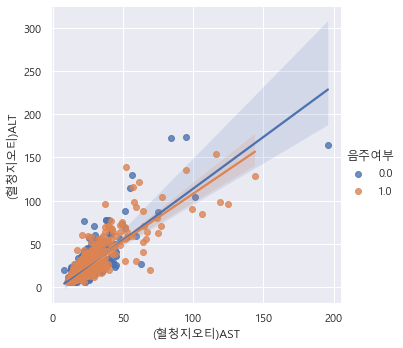

In [72]:
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

In [73]:
# 이상치
df_ASLT_high = df[(df['(혈청지오티)AST'] > 400) | (df['(혈청지오티)ALT'] > 400)]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
2771,2017,2772,1,8,44,170.0,65.0,82.2,1.0,0.9,...,86.0,15.2,1.0,0.8,544.0,968.0,280.0,3.0,1.0,0
5047,2017,5048,1,7,31,170.0,60.0,77.0,1.5,1.5,...,109.0,16.1,1.0,1.2,607.0,430.0,33.0,1.0,1.0,1
10803,2017,10804,1,10,46,170.0,75.0,83.1,0.7,1.0,...,136.0,16.7,1.0,1.1,148.0,449.0,228.0,3.0,1.0,1
14948,2017,14949,1,5,47,180.0,130.0,110.0,1.2,1.5,...,246.0,15.6,1.0,0.9,241.0,540.0,115.0,1.0,0.0,0
16433,2017,16434,2,12,44,160.0,65.0,86.0,1.0,1.0,...,149.0,13.0,1.0,0.8,457.0,629.0,672.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990160,2017,990161,1,13,11,170.0,70.0,85.0,0.8,0.8,...,90.0,14.9,2.0,1.1,480.0,474.0,626.0,2.0,0.0,0
990909,2017,990910,1,9,48,165.0,80.0,95.0,1.5,1.5,...,75.0,15.2,1.0,0.9,198.0,469.0,34.0,3.0,0.0,0
991596,2017,991597,2,16,48,150.0,40.0,67.0,0.7,0.6,...,62.0,12.3,1.0,0.8,601.0,743.0,39.0,1.0,0.0,0
996864,2017,996865,2,7,44,155.0,45.0,69.0,1.2,1.5,...,78.0,14.7,2.0,0.8,286.0,468.0,490.0,1.0,0.0,0


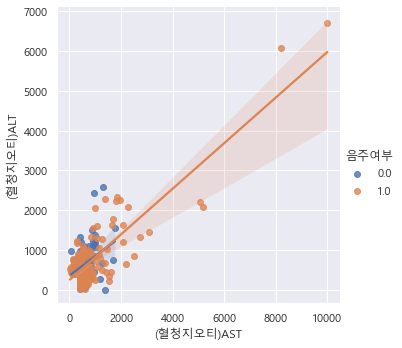

In [74]:
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

In [75]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high['(혈청지오티)AST'] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
677177,2.0,2.0,100.0,60.0,107.0,129.0,152.0,30.0,69.0,13.0,1.0,1.2,8200.0,6080.0,888.0,1.0,1.0
887237,1.0,1.0,97.0,71.0,86.0,158.0,111.0,100.0,35.0,17.8,3.0,0.8,9999.0,6710.0,379.0,3.0,1.0


### 15. distplot
도수분포표 로 밀도함수로 표현함

sns.distplot(여기에 시리즈가 들어감)

In [76]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부'],
      dtype='object')

F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

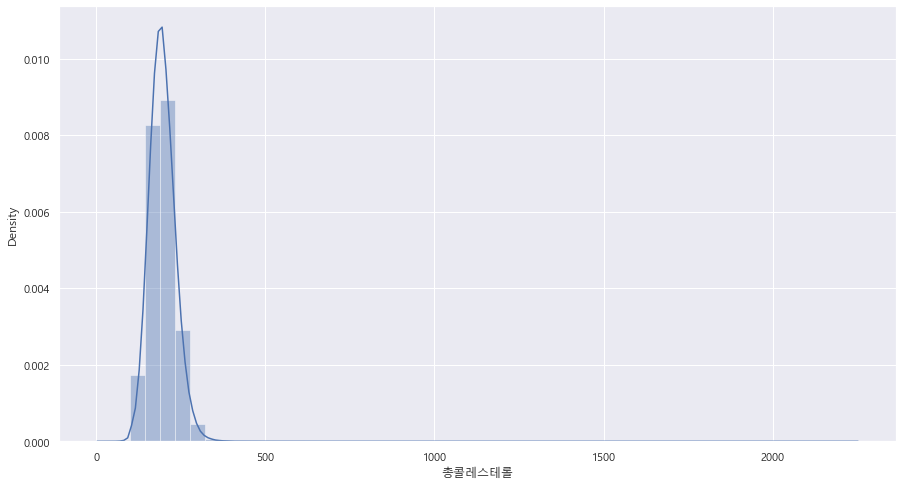

In [77]:
plt.figure(figsize=(15, 8))
sns.distplot(df['총콜레스테롤'])  # 결측치 제거해서 가능 결측치 있으면 안그려짐

In [78]:
df['총콜레스테롤'].notnull()  # 결측치가 아닌것만의 칼럼 True False Serise

0         True
1         True
2         True
3         True
4         True
          ... 
999995    True
999996    True
999997    True
999998    True
999999    True
Name: 총콜레스테롤, Length: 1000000, dtype: bool

In [79]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤']
df_chol

0         178.0
1         255.0
2         211.0
3         160.0
4         253.0
          ...  
999995    196.0
999996    199.0
999997    240.0
999998    267.0
999999    172.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

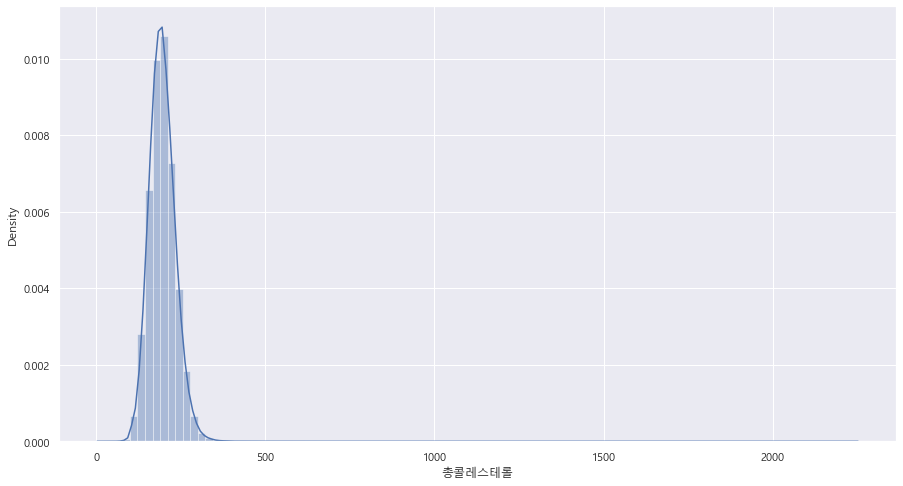

In [80]:
plt.figure(figsize=(15, 8))
sns.distplot(df_chol, bins=100)

In [81]:
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

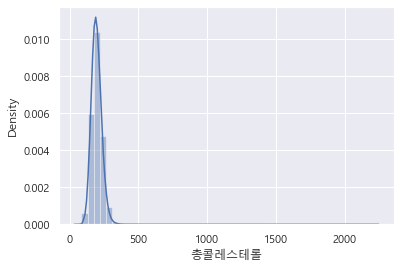

In [230]:
# 음주여부에 대해서 '총콜레스트롤' distplot을 그려보세요.
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'])

F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

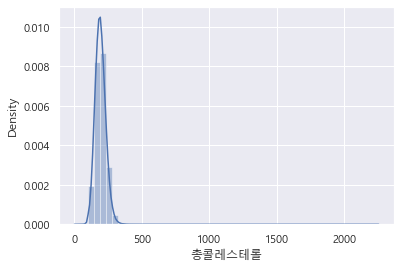

In [229]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'])

F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3_envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

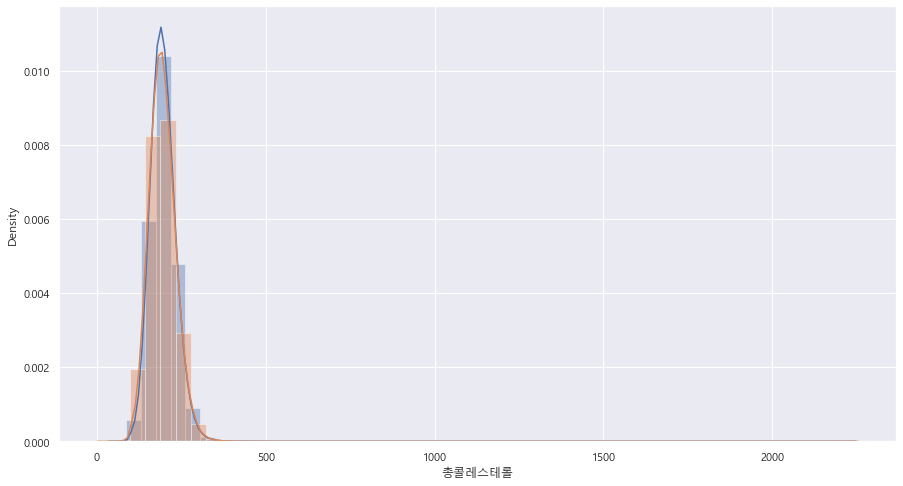

In [232]:
# 음주여부에 대한 콜레스트롤을 displot으로 그리며 하나의 그래프가 되게
plt.figure(figsize=(15, 8))
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'])
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'])

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

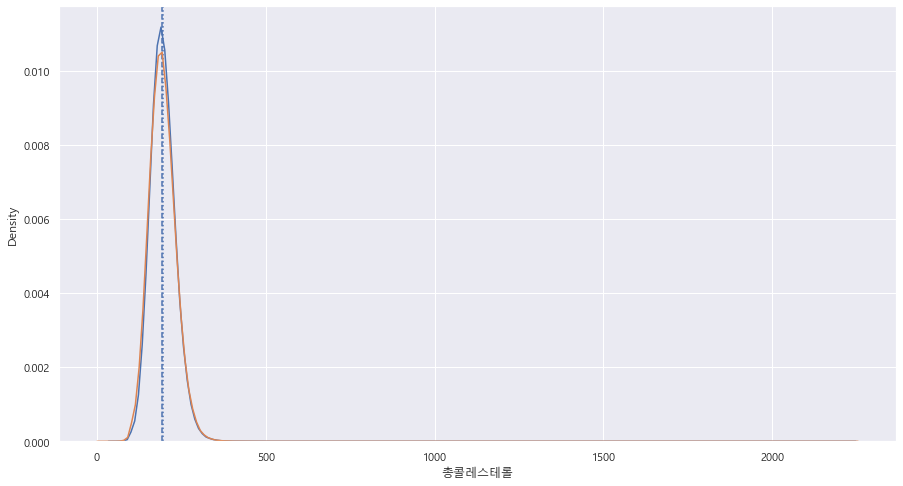

In [239]:
plt.figure(figsize=(15, 8))  #히스토그램을 빼고
plt.axvline(df['총콜레스테롤'].mean(), linestyle=":")
plt.axvline(df['총콜레스테롤'].median(), linestyle="--")
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'],
            label='음주중')
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'],
            label='음주안함')

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

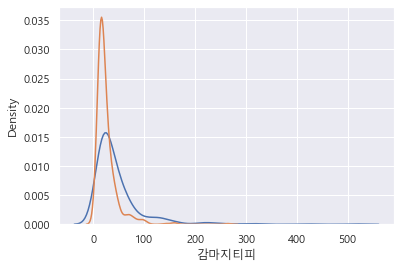

In [246]:
#감마지티피 값에 따라 음주여부
sns.kdeplot(df_sample.loc[df_sample['음주여부'] == 1, '감마지티피'], label='음주중')
sns.kdeplot(df_sample.loc[df_sample['음주여부'] == 0, '감마지티피'], label='음주안함')

16. 상관분석

In [82]:
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', '시력(좌)', '시력(우)',
           '청력(좌)', '청력(우)',
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
           'LDL콜레스테롤', '혈색소',
           '요단백', '혈청크레아티닌', '(혈청지오티)ALT', '(혈청지오티)AST', '감마지티피', '흡연상태',
           '음주여부']

In [83]:
df_small = df_sample[columns]  # comlumns에 있는 칼럼만 가져옴
df_small

,연령대코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)ALT,(혈청지오티)AST,감마지티피,흡연상태,음주여부
276826,12,85.0,155.0,113.0,0.7,1.0,1.0,1.0,150.0,100.0,...,39.0,112.0,15.0,2.0,1.2,33.0,31.0,35.0,1.0,0.0
849425,15,45.0,155.0,73.0,0.5,0.4,1.0,1.0,117.0,72.0,...,56.0,131.0,13.7,1.0,0.7,16.0,22.0,19.0,1.0,0.0
504499,11,45.0,170.0,63.0,0.7,0.4,1.0,1.0,120.0,70.0,...,71.0,109.0,15.0,1.0,1.0,19.0,19.0,15.0,3.0,0.0
601054,16,50.0,150.0,77.0,0.4,0.3,1.0,1.0,112.0,78.0,...,58.0,151.0,13.0,1.0,0.8,13.0,19.0,13.0,1.0,0.0
980221,13,65.0,150.0,95.0,1.0,0.8,1.0,1.0,129.0,85.0,...,94.0,71.0,13.7,1.0,0.6,164.0,196.0,265.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,11,50.0,155.0,65.1,1.0,0.8,1.0,1.0,108.0,70.0,...,88.0,118.0,13.6,1.0,0.7,16.0,21.0,22.0,2.0,1.0
875389,9,45.0,155.0,66.5,0.9,0.8,1.0,1.0,103.0,64.0,...,74.0,157.0,11.8,1.0,0.5,11.0,17.0,12.0,1.0,1.0
358458,11,50.0,160.0,72.0,0.9,0.8,1.0,1.0,110.0,80.0,...,85.0,150.0,14.1,1.0,0.7,18.0,24.0,11.0,1.0,0.0
808228,9,65.0,175.0,75.2,1.2,1.2,1.0,1.0,138.0,88.0,...,84.0,61.0,16.9,1.0,0.8,31.0,36.0,122.0,3.0,1.0


In [84]:
df_corr = df_small.corr()
df_corr

,연령대코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)ALT,(혈청지오티)AST,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.210610,-0.397412,0.134720,-0.201947,-0.203802,0.193769,0.253585,0.296807,0.149758,...,-0.121635,0.023206,-0.165788,-0.022885,0.020587,-0.014101,0.106376,0.052946,-0.136350,-0.277149
체중(5Kg 단위),-0.210610,1.000000,0.648489,0.790520,0.076534,0.133502,-0.038100,-0.070590,0.244673,0.287084,...,-0.357603,0.106049,0.508366,0.028840,0.190769,0.372930,0.196722,0.254150,0.397230,0.235974
신장(5Cm단위),-0.397412,0.648489,1.000000,0.293774,0.141800,0.156605,-0.100178,-0.121083,0.030012,0.118103,...,-0.152505,-0.003485,0.529475,0.014089,0.243101,0.187945,0.035321,0.171372,0.505945,0.362905
허리둘레,0.134720,0.790520,0.293774,1.000000,-0.033007,0.034518,0.048379,0.052245,0.333025,0.302398,...,-0.409940,0.098301,0.377023,-0.002252,0.149351,0.357288,0.229202,0.271566,0.268685,0.084514
시력(좌),-0.201947,0.076534,0.141800,-0.033007,1.000000,0.462877,-0.049368,-0.084603,-0.010112,-0.001695,...,0.021295,-0.015221,0.073866,0.010995,0.018104,0.029429,0.003379,0.011519,0.063964,0.073696
시력(우),-0.203802,0.133502,0.156605,0.034518,0.462877,1.000000,-0.041439,-0.096255,-0.020638,0.012802,...,-0.030666,0.044949,0.056753,0.009548,0.031835,0.083163,0.024706,0.045560,0.054681,0.063220
청력(좌),0.193769,-0.038100,-0.100178,0.048379,-0.049368,-0.041439,1.000000,0.512849,0.105602,0.034535,...,-0.015340,-0.018551,-0.015990,-0.026771,-0.026352,0.003031,0.014587,-0.006351,-0.034204,-0.037669
청력(우),0.253585,-0.070590,-0.121083,0.052245,-0.084603,-0.096255,0.512849,1.000000,0.127883,0.041907,...,-0.078820,-0.059298,-0.031084,-0.013656,-0.030057,-0.023672,0.002233,0.005842,-0.040937,-0.032475
수축기혈압,0.296807,0.244673,0.030012,0.333025,-0.010112,-0.020638,0.105602,0.127883,1.000000,0.744132,...,-0.138843,0.003982,0.143038,0.016896,0.090268,0.118240,0.143089,0.176208,0.108511,0.032543
이완기혈압,0.149758,0.287084,0.118103,0.302398,-0.001695,0.012802,0.034535,0.041907,0.744132,1.000000,...,-0.090783,0.045014,0.219912,0.021567,0.131162,0.154490,0.159043,0.204673,0.144251,0.110143


In [85]:
df_corr['신장(5Cm단위)'].sort_values(ascending=False)

신장(5Cm단위)      1.000000
체중(5Kg 단위)     0.648489
혈색소            0.529475
흡연상태           0.505945
음주여부           0.362905
허리둘레           0.293774
혈청크레아티닌        0.243101
(혈청지오티)ALT     0.187945
감마지티피          0.171372
시력(우)          0.156605
시력(좌)          0.141800
이완기혈압          0.118103
트리글리세라이드       0.113687
식전혈당(공복혈당)     0.059881
(혈청지오티)AST     0.035321
수축기혈압          0.030012
요단백            0.014089
LDL콜레스테롤      -0.003485
총콜레스테롤        -0.013813
청력(좌)         -0.100178
청력(우)         -0.121083
HDL콜레스테롤      -0.152505
연령대코드(5세단위)   -0.397412
Name: 신장(5Cm단위), dtype: float64

In [86]:
df_corr.loc[df_corr['신장(5Cm단위)'] > 0.1, '신장(5Cm단위)']

체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
허리둘레          0.293774
시력(좌)         0.141800
시력(우)         0.156605
이완기혈압         0.118103
트리글리세라이드      0.113687
혈색소           0.529475
혈청크레아티닌       0.243101
(혈청지오티)ALT    0.187945
감마지티피         0.171372
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [87]:
#음주여부에 대한 상관계수가 특정수치 이상인 데이터
df_corr['음주여부'].sort_values(ascending=False)

음주여부           1.000000
흡연상태           0.365642
신장(5Cm단위)      0.362905
혈색소            0.291863
감마지티피          0.250011
체중(5Kg 단위)     0.235974
이완기혈압          0.110143
트리글리세라이드       0.103018
(혈청지오티)ALT     0.095971
(혈청지오티)AST     0.088594
식전혈당(공복혈당)     0.086991
허리둘레           0.084514
시력(좌)          0.073696
혈청크레아티닌        0.072320
시력(우)          0.063220
HDL콜레스테롤       0.052452
수축기혈압          0.032543
총콜레스테롤         0.019892
요단백           -0.012932
청력(우)         -0.032475
청력(좌)         -0.037669
LDL콜레스테롤      -0.046947
연령대코드(5세단위)   -0.277149
Name: 음주여부, dtype: float64

In [88]:
df_corr.loc[df_corr['음주여부'] > 0.25, '음주여부']

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [89]:
df_corr['혈색소'].sort_values(ascending=False).head(10)

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
감마지티피         0.236197
이완기혈압         0.219912
혈청크레아티닌       0.214091
Name: 혈색소, dtype: float64

16.2 heatmap

<AxesSubplot:>

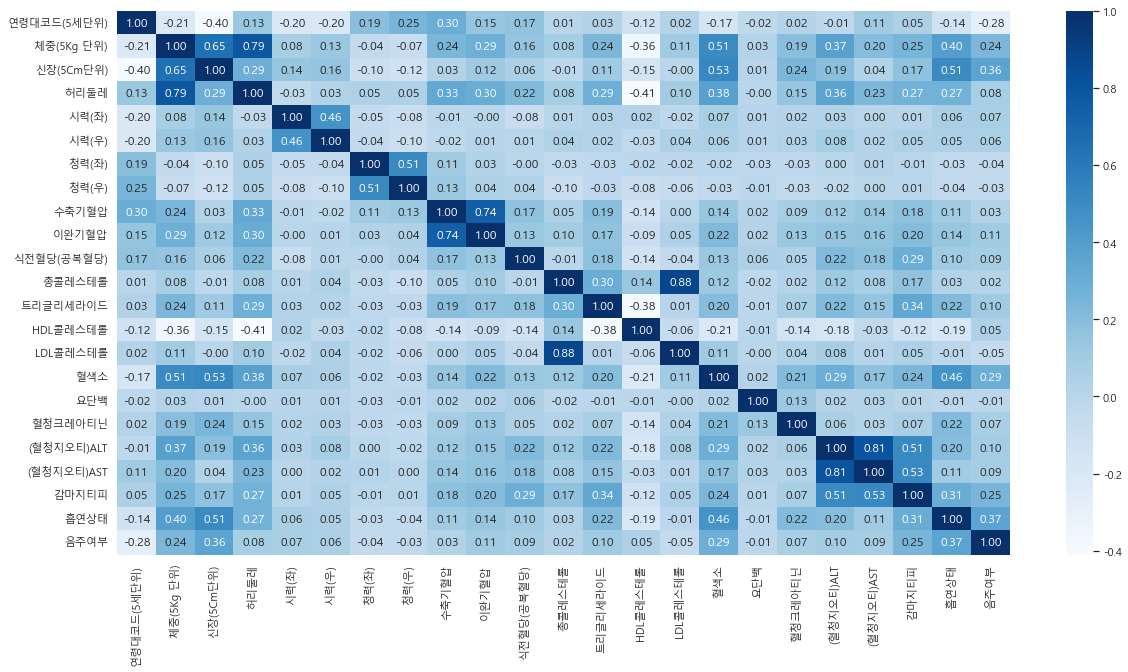

In [92]:
#상관곅수를 히트맵으로 표현

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues')

In [93]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

<AxesSubplot:>

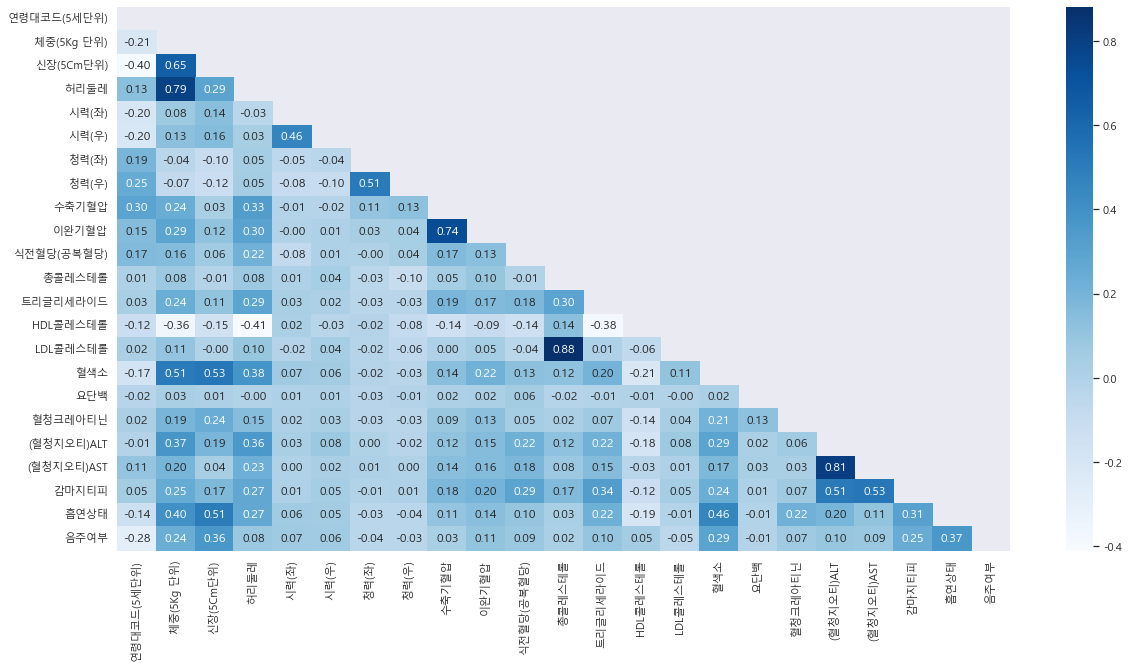

In [94]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, mask=mask, annot=True, fmt='.2f', cmap='Blues')